GAMEPLAN
- Get data from API
- Clean data
- Explore data for trends

- Figure out best models to use to (PCA)
- Try multiple models, tweak hyper parameters
- Delve into predicting different things

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utilities.graphing_utils as utl

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df['bmi'].median()

28.1

In [9]:
df.loc[df['bmi'] > 70]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [10]:
df.loc[df['stroke'] == 1].loc[df['avg_glucose_level'] < 140]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [11]:
df.loc[df['stroke'] == 1].loc[df['bmi'] < 20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
103,4712,Female,81.0,0,1,Yes,Self-employed,Rural,78.70,19.4,Unknown,1
230,10552,Female,81.0,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1
248,43424,Female,78.0,0,0,Yes,Private,Rural,78.81,19.6,Unknown,1


In [12]:
df.loc[df['stroke'] == 1].loc[df['age'] < 20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [16]:
df['bmi'].fillna(df['bmi'].median(), inplace = True) #fill na with median

In [17]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [18]:
#dropping 'other' gender instance due to one-off outlier
df.drop(df.index[df['gender'] == 'Other'], inplace = True)


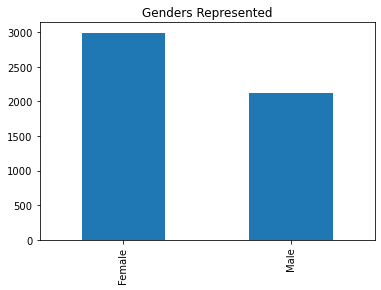

In [12]:
df['gender'].value_counts().plot(kind='bar')
plt.title('Genders Represented');

In [13]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [14]:
#processing smoking as an ordinal categorical variable
df["smoking_status"]=df["smoking_status"].map({"Unknown": 0,"never smoked" : 1,"formerly smoked" : 2,"smokes" : 3})

In [15]:
df['smoking_status'].value_counts(normalize=True)

1    0.370327
0    0.302212
2    0.173028
3    0.154433
Name: smoking_status, dtype: float64

In [16]:
#stroke feature is very imbalanced
df['stroke'].value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

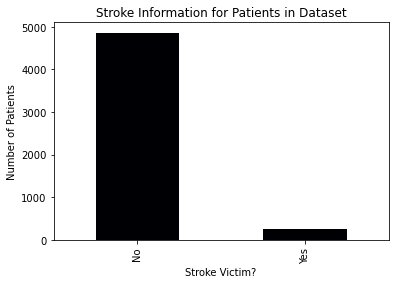

In [17]:
df['stroke'].value_counts().plot(kind = 'bar', cmap='inferno')
plt.title('Stroke Information for Patients in Dataset')
plt.xlabel('Stroke Victim?')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xticks();

Will look to add in Synthetic Minority Oversampling TEchnique (SMOTE) to deal with imbalance in classes and small amount of data

In [18]:
#get dummies for rest of categorical features
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.005708,0.012012,0.006430,0.001929,0.013944,0.005471,0.023545,-0.019879,-0.013869,-0.001219
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.324211,0.307164,0.245239,-0.027752,0.679084,-0.078667,0.116678,0.327949,-0.634320,0.014031
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.158252,0.106698,0.127891,0.021223,0.164187,-0.021612,-0.005358,0.115417,-0.129535,-0.007980
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.036879,0.085254,0.134905,0.085685,0.114601,-0.015715,0.000068,0.086742,-0.091654,0.003045
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.167033,0.079708,0.131991,0.054722,0.155329,-0.014665,0.016451,0.062770,-0.102195,-0.004783
bmi,0.005708,0.324211,0.158252,0.036879,0.167033,1.000000,0.215540,0.036075,-0.026452,0.334770,-0.028340,0.204057,0.070094,-0.442204,-0.000444
smoking_status,0.012012,0.307164,0.106698,0.085254,0.079708,0.215540,1.000000,0.054953,-0.002712,0.285119,-0.034693,0.173097,0.079172,-0.403573,0.023016
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.036075,0.054953,1.000000,0.009081,0.108299,-0.014885,0.011927,0.062150,-0.083888,0.015415
gender_Male,0.001929,-0.027752,0.021223,0.085685,0.054722,-0.026452,-0.002712,0.009081,1.000000,-0.030171,0.011486,-0.032502,-0.026045,0.089226,-0.006105
ever_married_Yes,0.013944,0.679084,0.164187,0.114601,0.155329,0.334770,0.285119,0.108299,-0.030171,1.000000,-0.090873,0.154104,0.192637,-0.544658,0.005988


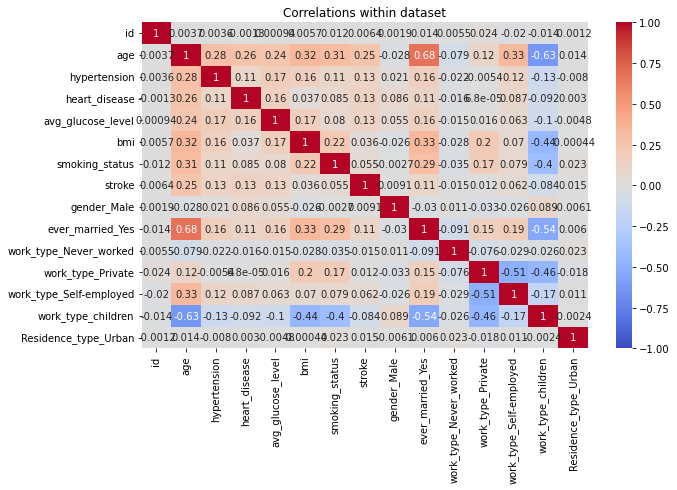

In [20]:
utl.all_corr_heatmap(
    data = df,
    size_var= 100,
    title = ''
)
plt.title('Correlations within dataset');

In [19]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.005708,0.012012,0.006430,0.001929,0.013944,0.005471,0.023545,-0.019879,-0.013869,-0.001219
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.324211,0.307164,0.245239,-0.027752,0.679084,-0.078667,0.116678,0.327949,-0.634320,0.014031
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.158252,0.106698,0.127891,0.021223,0.164187,-0.021612,-0.005358,0.115417,-0.129535,-0.007980
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.036879,0.085254,0.134905,0.085685,0.114601,-0.015715,0.000068,0.086742,-0.091654,0.003045
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.167033,0.079708,0.131991,0.054722,0.155329,-0.014665,0.016451,0.062770,-0.102195,-0.004783
bmi,0.005708,0.324211,0.158252,0.036879,0.167033,1.000000,0.215540,0.036075,-0.026452,0.334770,-0.028340,0.204057,0.070094,-0.442204,-0.000444
smoking_status,0.012012,0.307164,0.106698,0.085254,0.079708,0.215540,1.000000,0.054953,-0.002712,0.285119,-0.034693,0.173097,0.079172,-0.403573,0.023016
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.036075,0.054953,1.000000,0.009081,0.108299,-0.014885,0.011927,0.062150,-0.083888,0.015415
gender_Male,0.001929,-0.027752,0.021223,0.085685,0.054722,-0.026452,-0.002712,0.009081,1.000000,-0.030171,0.011486,-0.032502,-0.026045,0.089226,-0.006105
ever_married_Yes,0.013944,0.679084,0.164187,0.114601,0.155329,0.334770,0.285119,0.108299,-0.030171,1.000000,-0.090873,0.154104,0.192637,-0.544658,0.005988


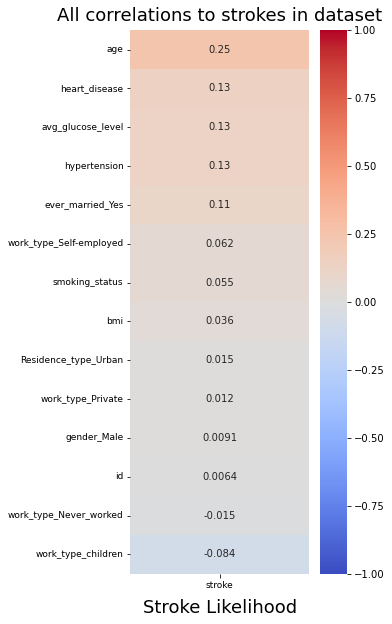

In [21]:
utl.one_corr_heatmap(
    data = df,
    target_variable='stroke',
    x_label = 'Stroke Likelihood',
    title = 'All correlations to strokes in dataset'
)

<Figure size 432x720 with 0 Axes>

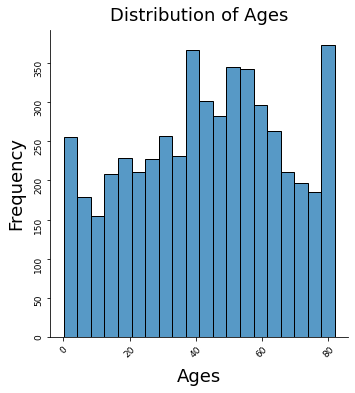

In [22]:
utl.my_hist(
    data = df,
    x_col = "age", 
    title = "Distribution of Ages",
    x_label = "Ages");

<Figure size 432x720 with 0 Axes>

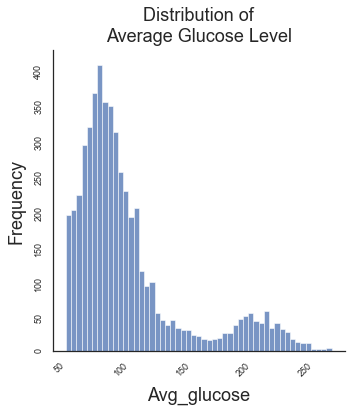

In [63]:
utl.my_hist(
    data = df,
    x_col = "avg_glucose_level", 
    title = "Distribution of\nAverage Glucose Level",
    x_label = "Avg_glucose");

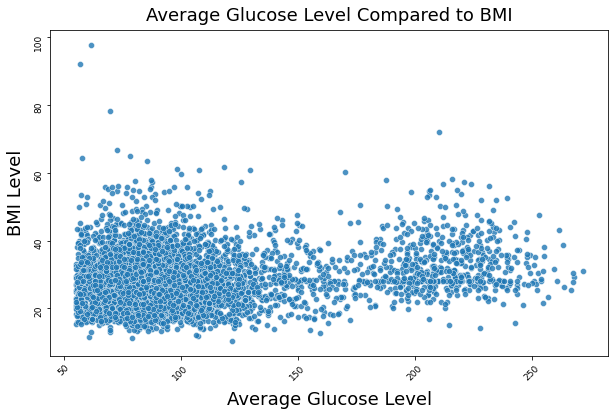

In [23]:
utl.my_scatterplot(
    data = df,
    x_col = "avg_glucose_level", 
    y_col = "bmi", 
    title = "Average Glucose Level Compared to BMI",
    x_label = "Average Glucose Level",
    y_label = "BMI Level",
    alpha=.8
);

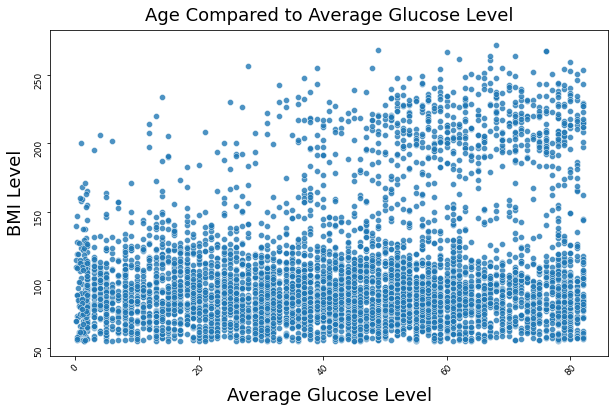

In [24]:
utl.my_scatterplot(
    data = df,
    x_col = "age", 
    y_col = "avg_glucose_level", 
    title = "Age Compared to Average Glucose Level",
    x_label = "Average Glucose Level",
    y_label = "BMI Level",
    alpha=.8
);

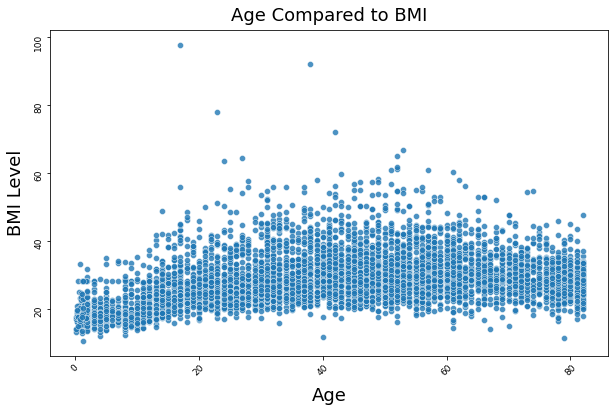

In [25]:
utl.my_scatterplot(
    data = df,
    x_col = "age", 
    y_col = "bmi", 
    title = "Age Compared to BMI",
    x_label = "Age",
    y_label = "BMI Level",
    alpha=.8
);

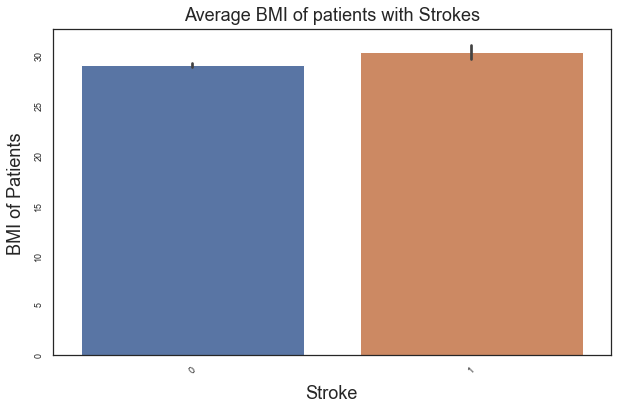

In [64]:
utl.my_barplot(
    data = df,
    x_col = "stroke", 
    y_col = "bmi", 
    title = "Average BMI of patients with Strokes",
    x_label = "Stroke",
    y_label = "BMI of Patients"
)

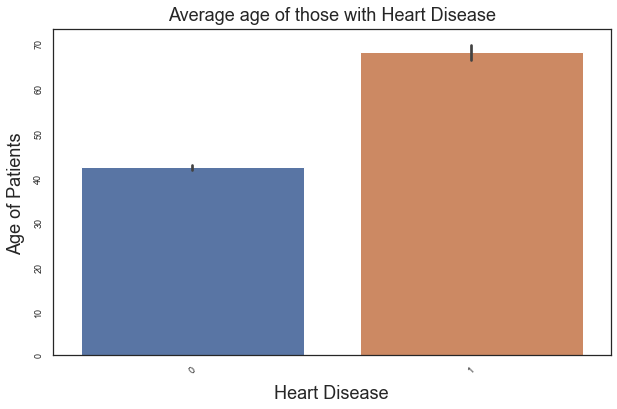

In [62]:
utl.my_barplot(
    data = df,
    x_col = "stroke", 
    y_col = "age", 
    title = "Average age of those with Heart Disease",
    x_label = "Heart Disease",
    y_label = "Age of Patients"
)

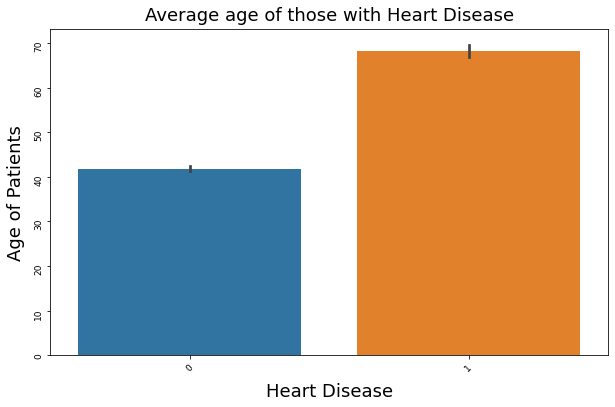

In [27]:
utl.my_barplot(
    data = df,
    x_col = "heart_disease", 
    y_col = "age", 
    title = "Average age of those with Heart Disease",
    x_label = "Heart Disease",
    y_label = "Age of Patients"
)

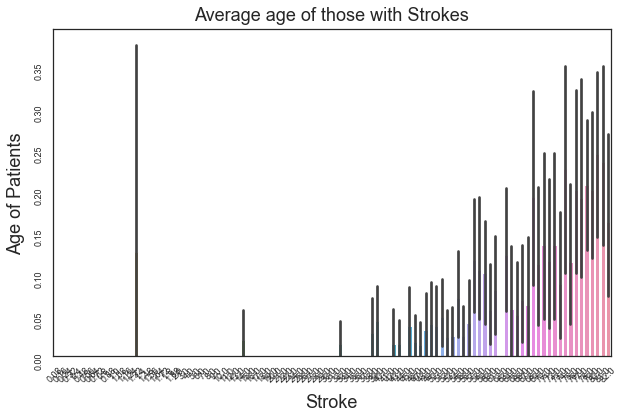

In [69]:
utl.my_barplot(
    data = df,
    x_col = 'age', 
    y_col = "stroke", 
    title = "Average age of those with Strokes",
    x_label = "Stroke",
    y_label = "Age of Patients"
)

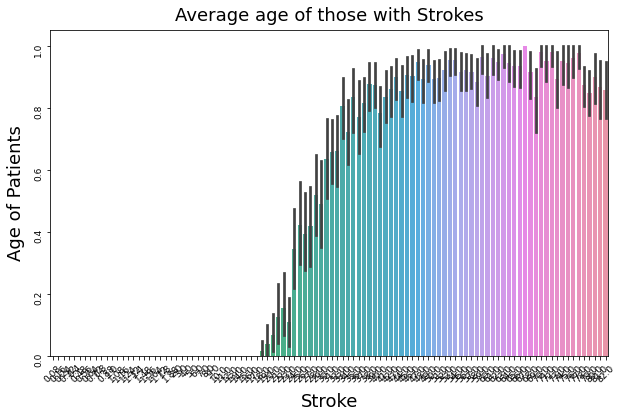

In [28]:
utl.my_barplot(
    data = df,
    x_col = 'age', 
    y_col = "ever_married_Yes", 
    title = "Average age of those with Strokes",
    x_label = "Stroke",
    y_label = "Age of Patients"
)

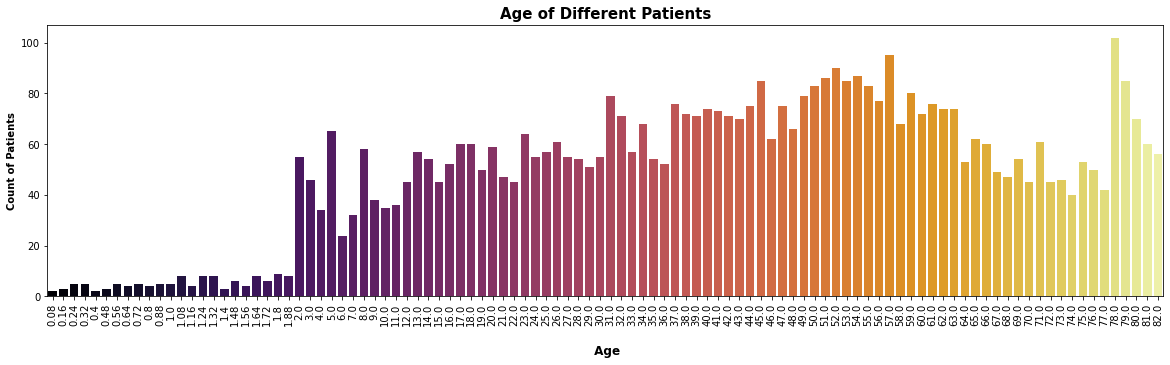

In [25]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(x=df.age, palette='inferno')
plt.xticks(rotation=90)
plt.xlabel('\n Age', fontsize=12, fontweight='bold')
plt.ylabel('Count of Patients', fontsize=10, fontweight='bold')
plt.title('Age of Different Patients', fontweight = 'bold', fontsize='15')
plt.show()

In [26]:
df.loc[df['stroke'] == 1]

AttributeError: 'DataFrame' object has no attribute 'plt'

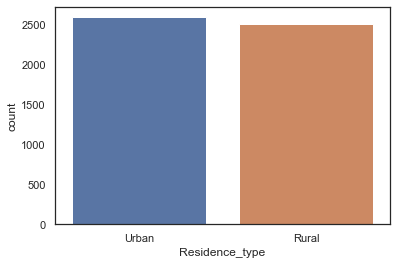

In [41]:
sns.set_theme(style="white")
ax = sns.countplot(data=df, x="Residence_type")
plt.show()

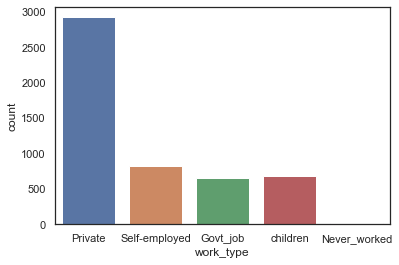

In [43]:
sns.set_theme(style="white")
ax = sns.countplot(data=df, x="work_type")
plt.show()

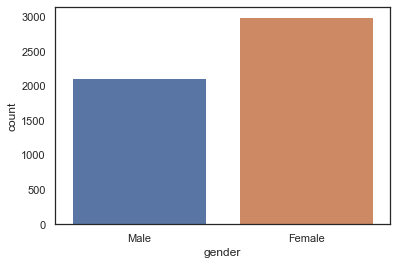

In [45]:
sns.set_theme(style="white")
ax = sns.countplot(data=df, x="gender")
plt.show()

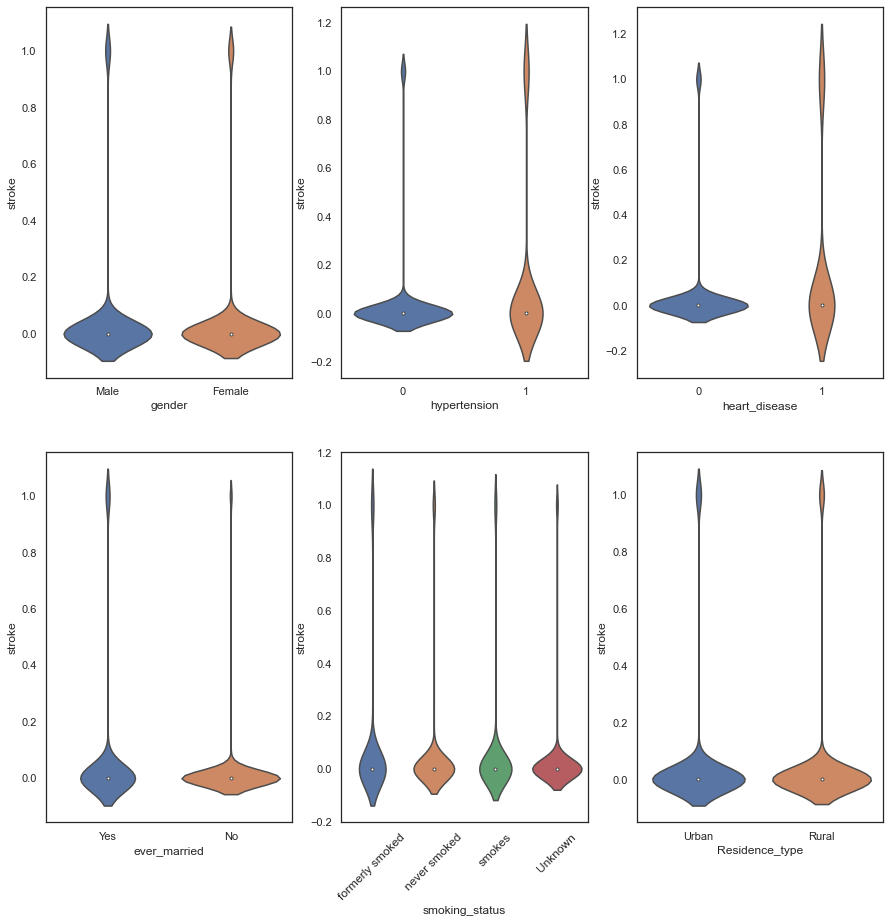

In [67]:
plt.figure(figsize=(15,15))
sns.set_theme(style="white")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'smoking_status', y = 'stroke', data = df)
plt.xticks(fontsize=12, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

#inspiration from https://www.kaggle.com/siddheshera/stroke-eda-smote-9-models-90-accuracy

May want to group ages to show this more clearly